In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import scipy.stats as scs

%matplotlib inline

In [22]:
samples = 40

a  = scs.norm(70, 3).rvs(samples)
b  = scs.norm(200, 25).rvs(samples)
c  = scs.norm(30, 5).rvs(samples)
d  = scs.binom(10, 0.3).rvs(samples)
e  = scs.uniform(3, 10).rvs(samples)
f  = scs.norm(170, 3).rvs(samples)
g  = scs.norm(23, 25).rvs(samples)
h  = scs.norm(303, 5).rvs(samples)
i  = scs.binom(150, 0.3).rvs(samples)
j  = scs.uniform(72, 10).rvs(samples)
k  = scs.norm(79, 3).rvs(samples)
l  = scs.norm(210, 25).rvs(samples)
m  = scs.norm(31, 5).rvs(samples)
n  = scs.binom(11, 0.3).rvs(samples)
o  = scs.uniform(34, 10).rvs(samples)
p  = scs.norm(79, 3).rvs(samples)
q  = scs.norm(22, 25).rvs(samples)
r  = scs.norm(38, 5).rvs(samples)
s  = scs.binom(56, 0.3).rvs(samples)
t  = scs.uniform(85, 10).rvs(samples)
epsilon    = scs.norm(0, 2).rvs(samples)
intercept  = 250
betas      = np.array([2, 3, 1, 7, 8, 34, 19, 2, 9, -11, 2, 4, 9, 3, -2, 5, 7, -8, 1, -4])
predictors = np.array([a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t]).T

In [23]:
y = (predictors @ betas) + epsilon + intercept + (a * b)
X = predictors

# Baseline

In [24]:
scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)
    model = LinearRegression().fit(X_train, y_train)
    mse = mean_squared_error(y_test, model.predict(X_test))
    scores.append(mse)
    
scores = np.array(scores)
mean = scores.mean()
std = scores.std(ddof=1)
mean - (2*std), mean + (2*std)
    #print (mse)
    
# find the mean of all the MSEs and 2 standard deviationsaway, as a range
# i.e., (5000 - 8000)


(-6340.051074074225, 52298.17466091105)

# Split data into train and test

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

# Scale data

In [26]:
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

# KFold

In [27]:
kf = KFold(n_splits=5)

# Cross Validation

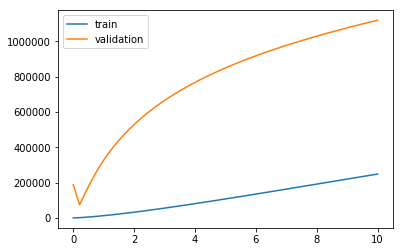

In [28]:
betas = []
scores_train = []
scores_val  = []
alphas = np.linspace(0, 10) # 50 values between 0 and 10
for alpha in alphas: # for each alpha do the below
    tk_scores = []
    vk_scores = []
    bk_values = []
    for train_index, validation_index in kf.split(X_train):
        Xt = X_train[train_index]
        yt = y_train[train_index]
        Xv = X_train[validation_index]
        yv = y_train[validation_index]

        model = Ridge(alpha=alpha).fit(Xt, yt)
        
        tk_scores.append(mean_squared_error(yt, model.predict(Xt)))
        vk_scores.append(mean_squared_error(yv, model.predict(Xv)))
        bk_values.append(model.coef_)
        
    # find average of all 5 scores
    train_mean = sum(tk_scores) / kf.get_n_splits() 
    val_mean = sum(vk_scores) / kf.get_n_splits()
    betas_mean = np.array(bk_values).mean(axis=0)
    
    scores_train.append(train_mean)
    scores_val.append(val_mean)
    betas.append(betas_mean)

plt.plot(alphas, scores_train, label='train')
plt.plot(alphas, scores_val, label='validation')
plt.legend()
plt.show()

In [29]:
alphas[np.argmin(scores_val)]

0.20408163265306123

In [30]:
model = Ridge(alpha=alpha).fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test))

845333.9654619239

In [32]:
model = Ridge(alpha=0).fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test))

30041.605476606408

In [33]:
# looks like 0 is best